In [21]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [22]:
finance = pd.concat([train, test])
finance

ID  Customer_ID  Month            Name   Age          SSN  \
0        5634         3392      1   Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2   Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3   Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4   Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5   Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...             ...   ...          ...   
49995  155621        34304     12  Sarah McBridec  28.0   31350942.0   
49996  155630        37932      9           Nicks  25.0   78735990.0   
49997  155631        37932     10           Nicks  25.0   78735990.0   
49998  155632        37932     11           Nicks  25.0   78735990.0   
49999  155633        37932     12           Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
49995  Architect       20002.88            1929.906667               10.0   
49996   Mechanic       39628.99            3359.415833                4.0   
49997   Mechanic       39628.99            3359.415833                4.0   
49998   Mechanic       39628.99            3359.415833                4.0   
49999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
49995  ...         Bad           3571.70                 34.780553   
49996  ...        Good            502.38                 27.758522   
49997  ...        Good            502.38                 36.858542   
49998  ...        Good            502.38                 39.139840   
49999  ...        Good            502.38                 34.108530   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
49995               78.0                    Yes            60.964772   
49996              383.0                     NM            35.104023   
49997              384.0                     No            35.104023   
49998              385.0                     No            35.104023   
49999              386.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
49995                34.662906    Low_s

In [23]:
numerical_columns = finance.select_dtypes(include=['int64', 'float64'])
summary_stats = numerical_columns.describe()
columns_to_drop = ['ID', 'Customer_ID', 'SSN','Month','Num_Bank_Accounts','Changed_Credit_Limit',
                   'Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month']
summary_stats = summary_stats.drop(columns_to_drop, axis=1)
summary_stats


Age  Annual_Income  Monthly_Inhand_Salary  Num_Credit_Card  \
count  150000.000000  150000.000000          150000.000000    150000.000000   
mean       33.479060   50505.123449            4192.525296         5.533660   
std        10.767158   38299.358260            3182.728812         2.068672   
min        14.000000    7005.930000             303.645417         0.000000   
25%        25.000000   19342.972500            1625.558333         4.000000   
50%        33.000000   36999.705000            3091.000000         5.000000   
75%        42.000000   71683.470000            5951.373333         7.000000   
max        56.000000  179987.280000           15204.633333        11.000000   

       Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count  150000.000000  150000.000000        150000.000000   
mean       14.532080       3.532880            21.076753   
std         8.741316       2.446352            14.804854   
min         1.000000       0.000000             0.000000   
25%         7.000000       2.000000            10.000000   
50%        13.000000       3.000000            18.000000   
75%        20.000000       5.000000            28.000000   
max        34.000000       9.000000            62.000000   

       Amount_invested_monthly  Monthly_Balance  
count            150000.000000    150000.000000  
mean                 55.101315       392.937052  
std                  39.006867       201.716752  
min                   0.000000         0.007760  
25%                  27.959111       267.720142  
50%                  45.156550       333.921243  
75%                  71.295797       463.423068  
max                 434.191089      1183.930696

In [24]:
occupation_mean_income = finance.groupby('Occupation')['Annual_Income'].mean()
occupation_mean_income = occupation_mean_income.sort_index(ascending=False)
print(occupation_mean_income)

Occupation
Writer           51047.656034
Teacher          49865.039059
Scientist        51196.427705
Musician         51365.524320
Media_Manager    50618.437292
Mechanic         50095.107550
Manager          51466.767817
Lawyer           49594.217396
Journalist       48430.088415
Entrepreneur     50987.698177
Engineer         50730.654073
Doctor           49517.749976
Developer        50128.422143
Architect        51875.392298
Accountant       50726.120480
Name: Annual_Income, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting specific numerical columns
selected_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card','Num_of_Delayed_Payment','Outstanding_Debt','Interest_Rate','Credit_History_Age']
numeric_columns = finance[selected_columns]

# Create a figure with 2 subplots in each row
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))  

# Iterate through selected columns and create plots, assigning them to the appropriate subplot
for i, column in enumerate(selected_columns):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]  
    sns.histplot(numeric_columns[column], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout() 
plt.show

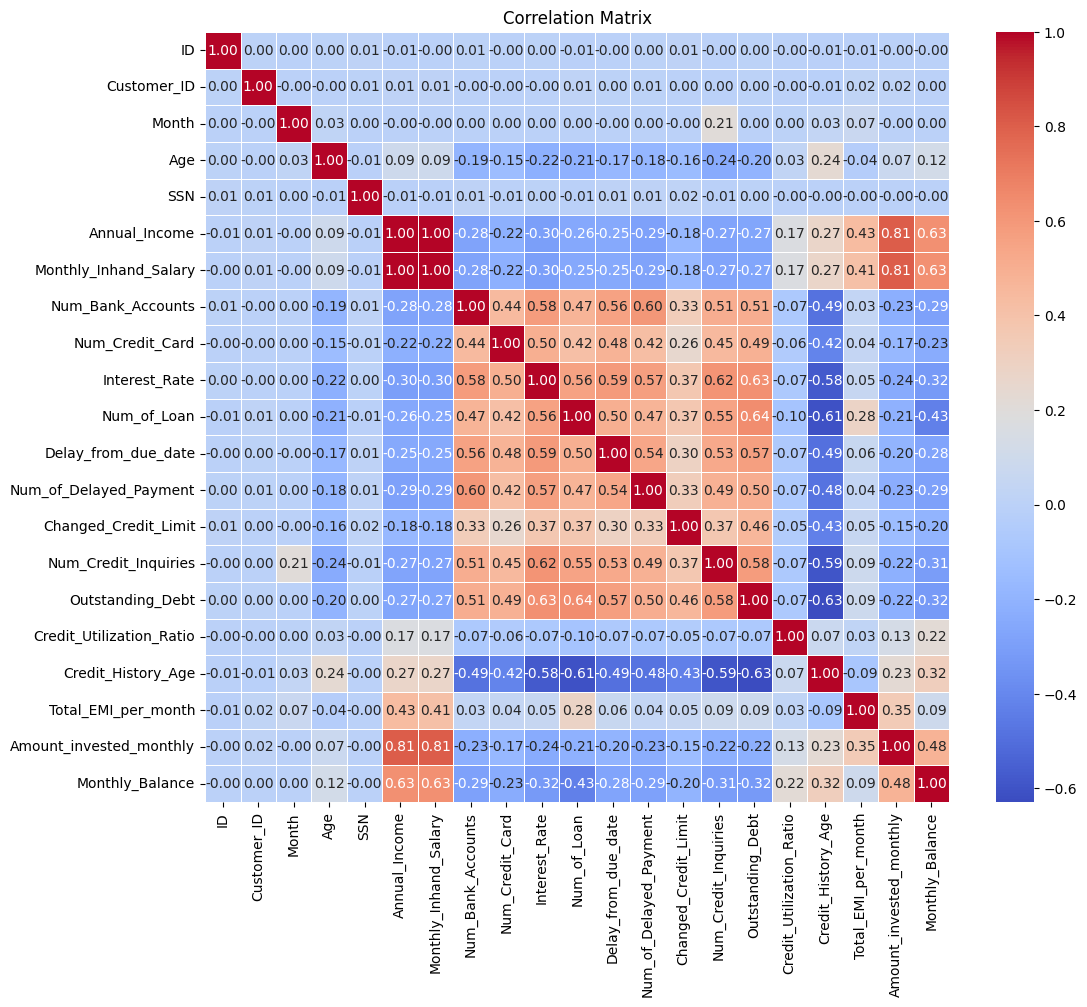

In [ ]:
# Exclude non-numeric columns before computing the correlation matrix
numeric_finance = finance.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_finance.corr()
correlation_matrix


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split the values at the first comma and take the first part
finance['Type_of_Loan'] = finance['Type_of_Loan'].str.split(',', n=1).str[0]

## Count the occurrences of each unique value in the 'Type_of_Loan' column
loan_counts = finance['Type_of_Loan'].value_counts()

# Print the counts
print(loan_counts)

Type_of_Loan
No Data                    17112
credit-builder loan        15624
payday loan                15372
personal loan              15300
not specified              14772
student loan               14508
debt consolidation loan    14472
mortgage loan              14448
auto loan                  14352
home equity loan           14040
Name: count, dtype: int64


In [ ]:
# Identify categorical variables
categorical_columns = finance.select_dtypes(include=['object']).columns

categorical_columns = categorical_columns.drop('Name')

# Print the names of categorical columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


Summary statistics for Occupation
                       mean     median           std
Occupation                                          
Accountant     50726.120480  38624.060  38374.260053
Architect      51875.392298  37827.770  39251.619825
Developer      50128.422143  36422.830  38593.903642
Doctor         49517.749976  35802.820  38015.420596
Engineer       50730.654073  39072.070  37892.655995
Entrepreneur   50987.698177  37360.940  37606.819618
Journalist     48430.088415  34742.740  37896.824703
Lawyer         49594.217396  35223.940  38106.578995
Manager        51466.767817  38437.180  38221.999468
Mechanic       50095.107550  36821.000  38854.660070
Media_Manager  50618.437292  36991.340  38219.394995
Musician       51365.524320  38486.445  38596.463568
Scientist      51196.427705  39487.820  37925.534998
Teacher        49865.039059  34954.880  38637.016533
Writer         51047.656034  37383.925  38122.465693


Summary statistics for Type_of_Loan
                           

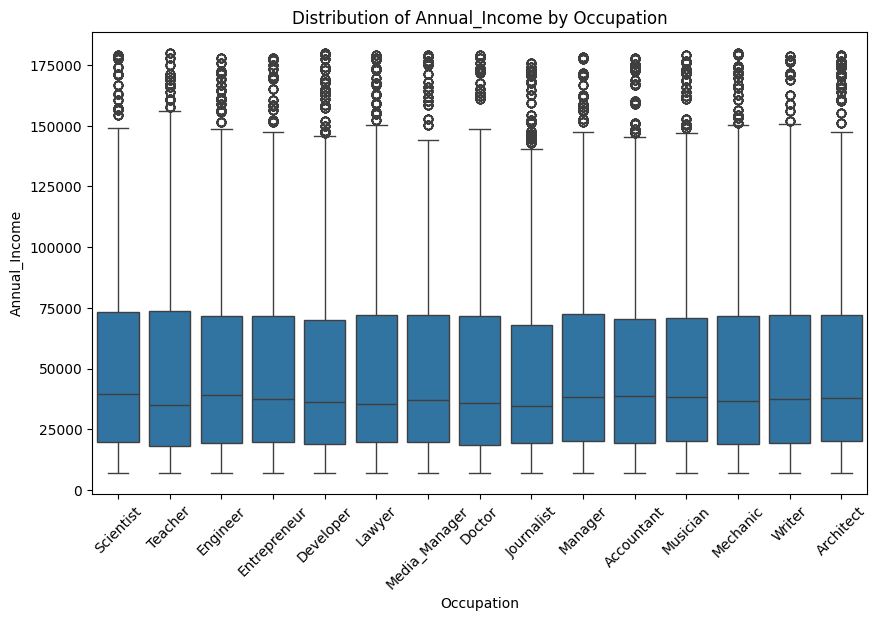

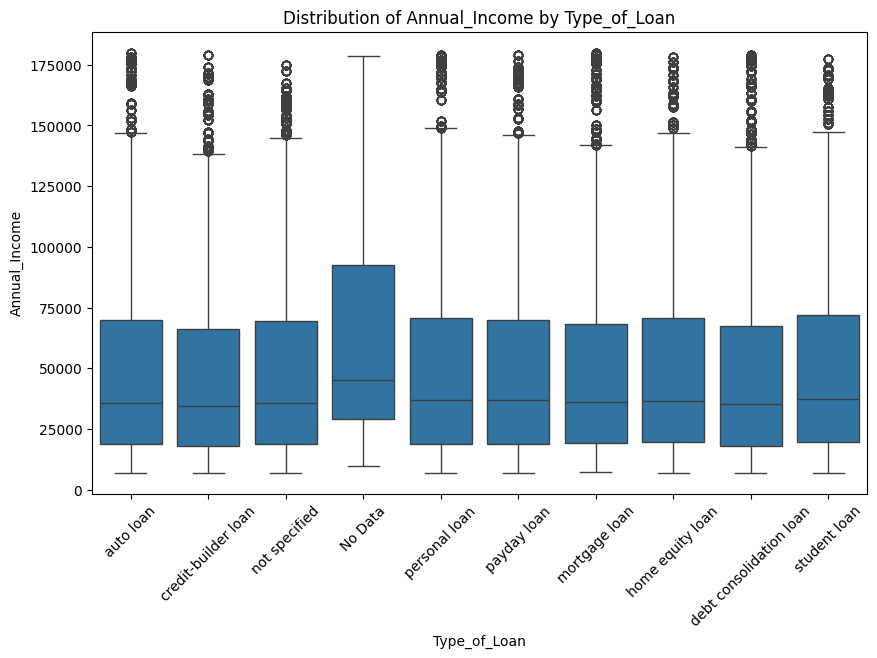

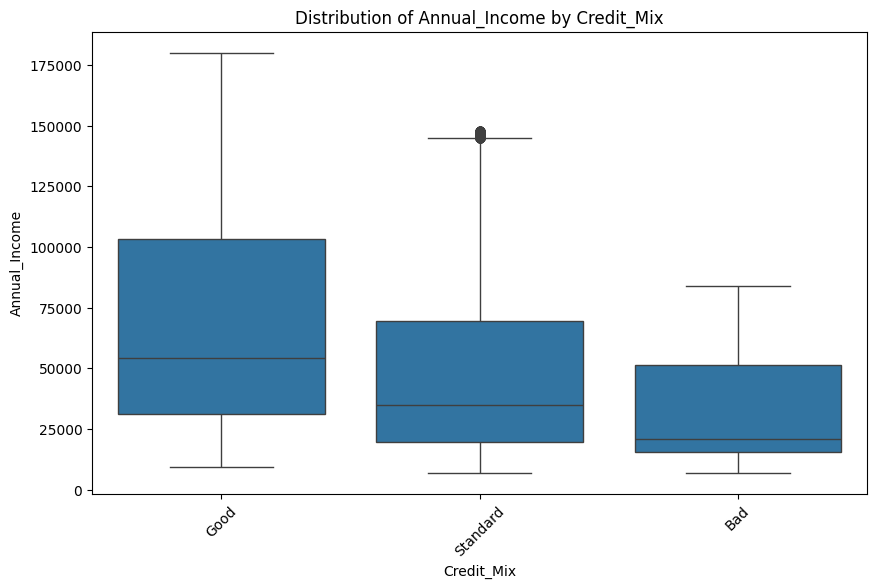

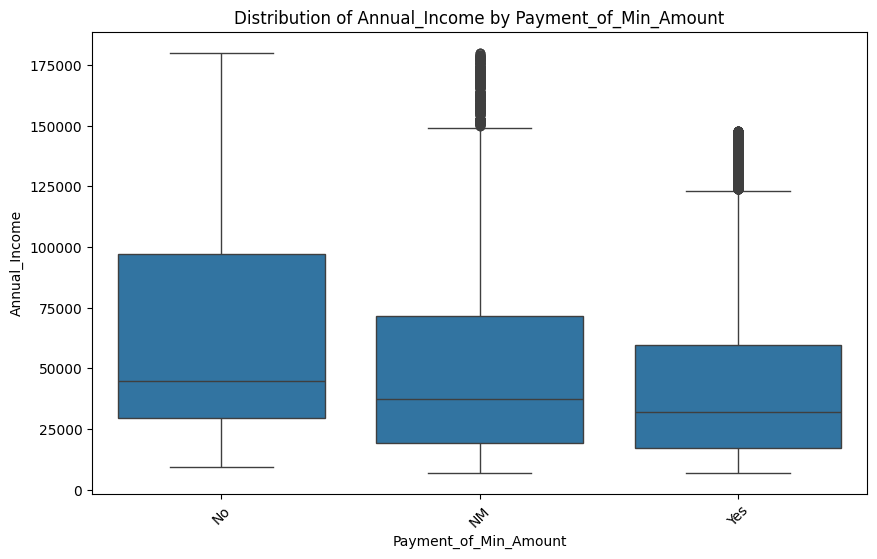

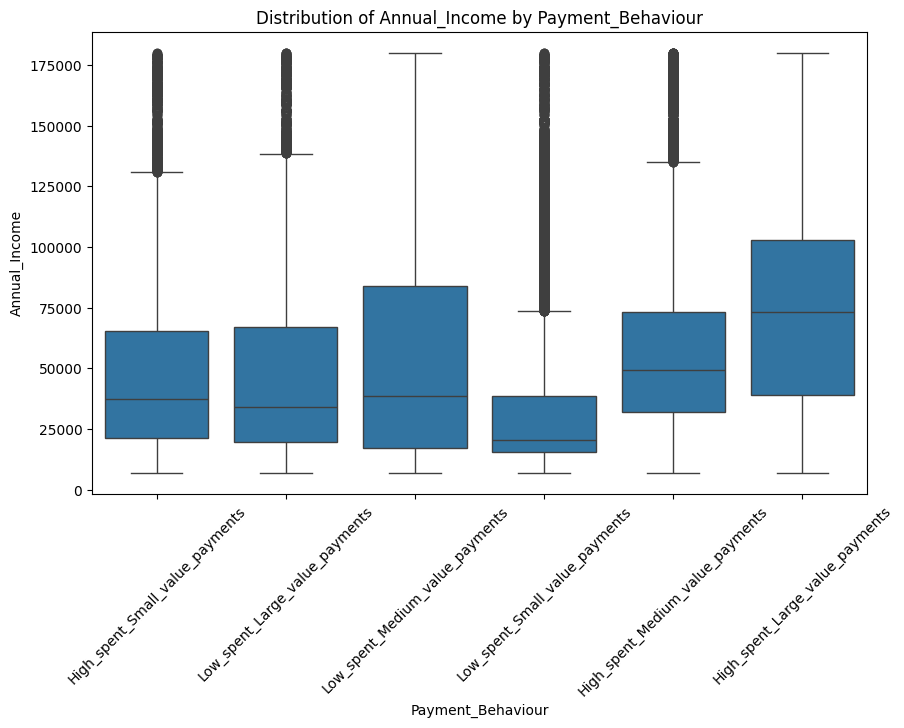

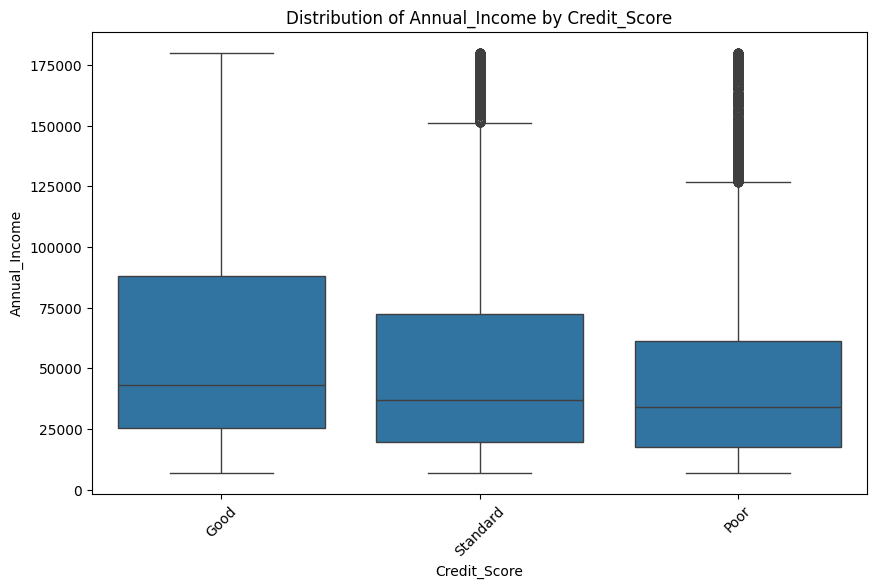

In [ ]:
# Group the data by categorical variables and calculate summary statistics
for column in categorical_columns:
    group_summary = finance.groupby(column)['Annual_Income'].agg(['mean', 'median', 'std'])
    print("Summary statistics for", column)
    print(group_summary)
    print("\n")

# Visualize distributions within each group
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=finance, x=column, y='Annual_Income')
    plt.title("Distribution of Annual_Income by " + column)
    plt.xlabel(column)
    plt.ylabel("Annual_Income")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd
from plotly.express import box

# Assuming 'finance' is your pandas DataFrame
fig = box(finance, x="Type_of_Loan", y="Annual_Income", title="Distribution of Annual_Income by Type of Loan")

# Customize labels (similar to plt.xlabel and plt.ylabel)
fig.update_xaxes(title_text="Type of Loan")
fig.update_yaxes(title_text="Annual Income")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=45)

fig.show()


In [ ]:
finance['Month'] = pd.to_datetime(finance['Month'], format='%m')

# Get month names from datetime values
finance['Month'] = finance['Month'].dt.month_name()

# Count the occurrences of each month
month_counts = finance['Month'].value_counts()

# Print the counts
print(month_counts)

Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64


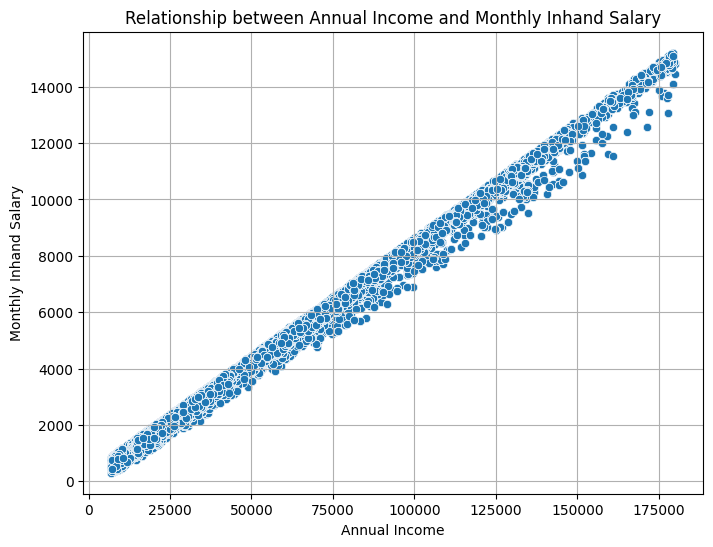

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



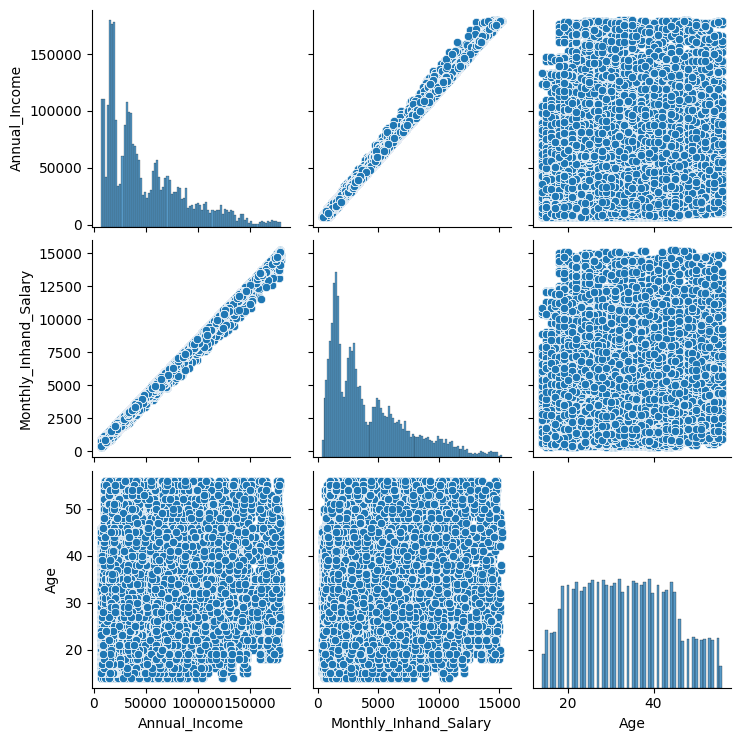

In [ ]:
import seaborn as sns

# Scatter plot: Relationship between 'Annual_Income' and 'Monthly_Inhand_Salary'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=finance, x='Annual_Income', y='Monthly_Inhand_Salary')
plt.title('Relationship between Annual Income and Monthly Inhand Salary')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Inhand Salary')
plt.grid(True)
plt.show()

# Pair plot: Pairwise relationships between numerical variables
sns.pairplot(finance[['Annual_Income', 'Monthly_Inhand_Salary', 'Age']])
plt.show()

In [ ]:
# Drop ID and Name columns as they are unique identifiers and i already have ssh 
finance_features = finance.drop(['ID', 'Name', 'Customer_ID','Num_Bank_Accounts'], axis=1)
# Get the value counts of 'Credit_Mix' column
credit_mix_counts = finance_features['Credit_Mix'].value_counts()

# Print the counts
print(credit_mix_counts)


Credit_Mix
Standard    68772
Good        45576
Bad         35652
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Drop ID and Name columns as they are unique identifiers and i already have ssh 
finance_features = finance.drop(['ID', 'Name', 'Customer_ID','Num_Bank_Accounts'], axis=1)

# Split the data into features (X) and target variable (y)
X = finance_features.drop('Credit_Mix', axis=1)  # Features
y = finance_features['Credit_Mix']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("whole shape of features", finance_features.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

whole shape of features (150000, 24)
Shape of X_train: (120000, 23)
Shape of X_test: (30000, 23)
Shape of y_train: (120000,)
Shape of y_test: (30000,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

# Define the pipeline for feature engineering
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline to the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Get transformed feature names
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Fit the pipeline to the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Now you can check the transformed feature names
print(transformed_feature_names)


['num__Age' 'num__SSN' 'num__Annual_Income' 'num__Monthly_Inhand_Salary'
 'num__Num_Credit_Card' 'num__Interest_Rate' 'num__Num_of_Loan'
 'num__Delay_from_due_date' 'num__Num_of_Delayed_Payment'
 'num__Changed_Credit_Limit' 'num__Num_Credit_Inquiries'
 'num__Outstanding_Debt' 'num__Credit_Utilization_Ratio'
 'num__Credit_History_Age' 'num__Total_EMI_per_month'
 'num__Amount_invested_monthly' 'num__Monthly_Balance' 'cat__Month_April'
 'cat__Month_August' 'cat__Month_December' 'cat__Month_February'
 'cat__Month_January' 'cat__Month_July' 'cat__Month_June'
 'cat__Month_March' 'cat__Month_May' 'cat__Month_November'
 'cat__Month_October' 'cat__Month_September' 'cat__Occupation_Accountant'
 'cat__Occupation_Architect' 'cat__Occupation_Developer'
 'cat__Occupation_Doctor' 'cat__Occupation_Engineer'
 'cat__Occupation_Entrepreneur' 'cat__Occupation_Journalist'
 'cat__Occupation_Lawyer' 'cat__Occupation_Manager'
 'cat__Occupation_Mechanic' 'cat__Occupation_Media_Manager'
 'cat__Occupation_Musici

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train_transformed, y_train)

# Optionally, you can make predictions on the training data
y_train_pred = rf_classifier.predict(X_train_transformed)

# Evaluate the model on the training data (if needed)
# For classification problems, you can use metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)  # Apply one-hot encoding to categorical features
    ],
    remainder='passthrough'  # Pass through numeric features unchanged
)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a pipeline combining preprocessing and modeling steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

In [ ]:
# Get feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(transformed_feature_names, feature_importances))

# Sort feature importances by their values in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 features and their importances
top_features = [feature[0] for feature in sorted_feature_importances[:10]]
top_importances = [feature[1] for feature in sorted_feature_importances[:10]]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = finance_features.drop('Credit_Mix', axis=1)  # Features
y = finance_features['Credit_Mix']  # Target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing for categorical data
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline including preprocessing and fitting the baseline model
pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the baseline model
pipeline_baseline.fit(X_train, y_train)

# Evaluate the baseline model
baseline_accuracy = pipeline_baseline.score(X_test, y_test)
print("Baseline Model Accuracy:", baseline_accuracy)

In [ ]:
import joblib

# Define the file path for saving the model
model= 'best_model.pkl'

# Save the best model to disk
joblib.dump(model, model)

In [ ]:
# Extract feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(transformed_feature_names, feature_importances))

# Sort feature importances by their values in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 features and their importances
top_features = [feature[0] for feature in sorted_feature_importances[:10]]
top_importances = [feature[1] for feature in sorted_feature_importances[:10]]

# Reverse the order to plot from highest to lowest importance
top_features.reverse()
top_importances.reverse()

top_features